In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy
np.random.seed(0)

## Data loading

In [7]:
cycleA = pd.read_csv("Data/Chickens data/CycleA-Data301022.csv", sep=";")
cycleB = pd.read_csv("Data/Chickens data/CycleB-Data301022.csv", sep=";")
meteorological_data = pd.read_csv("Data/Meteorological data/RW_20221107172813_515881_5121_1.csv", sep=",")

## Data cleaning

In [8]:
# removing rows with Nan values from chickens data
cycleA = cycleA.dropna()
cycleB = cycleB.dropna()

# removing rows with non valid data from meteorological data
meteorological_data = meteorological_data[meteorological_data["Average_daily_value"] != -999.0]

# removing "%" value from chickens data
cycleA["% laied"] = cycleA["% laied"].str.rstrip("%").astype(float)
cycleB["% laied"] = cycleB["% laied"].str.rstrip("%").astype(float)

# modifying data format of chickens data for uniformity: YYYY/MM/DD
cycleA['Arrival Chickens Date'] = pd.to_datetime(cycleA["Arrival Chickens Date"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleA['Date of Laid'] = pd.to_datetime(cycleA["Date of Laid"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleA['Date of Selling'] = pd.to_datetime(cycleA["Date of Selling"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleB['Arrival Chickens Date'] = pd.to_datetime(cycleB["Arrival Chickens Date"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleB['Date of Laid'] = pd.to_datetime(cycleB["Date of Laid"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleB['Date of Selling'] = pd.to_datetime(cycleB["Date of Selling"], dayfirst=True).dt.strftime('%Y/%m/%d')


## Data preview

### Cycle A

In [9]:
cycleA.head()

,Arrival Chickens Date,Chickens Death Per Day,Current Chickens,Date of Laid,# of Eggs,% laied,Water Consumption (gr),Feed Consumption (gr),Date of Selling,# Eggs sold (First quality),# Eggs sold (Second quality)
11,2018/07/19,4.0,42123.0,2018/08/18,0,0.00,86.5,71.5,2018/08/18,43200,0
16,2018/07/19,12.0,42071.0,2018/08/23,21660,51.48,89.5,74.5,2018/08/23,43200,0
20,2018/07/19,6.0,42049.0,2018/08/27,26370,62.71,94.0,87.5,2018/08/27,97680,0
23,2018/07/19,7.0,42031.0,2018/08/30,26270,62.50,100.0,87.0,2018/08/30,79710,0
24,2018/07/19,6.0,42025.0,2018/08/31,25920,61.68,101.5,89.5,2018/08/31,25050,0


### Cycle B

In [10]:
cycleB.head()

,Arrival Chickens Date,Chickens Death Per Day,Current Chickens,Date of Laid,# of Eggs,% laied,Water Consumption (gr),Feed Consumption (gr),Date of Selling,# Eggs sold (First quality),# Eggs sold (Second quality)
0,2020/08/09,1.0,42215.0,2020/09/04,1470.0,3.48,110.0,81.0,2020/09/04,1470.0,0.0
6,2020/08/09,3.0,42209.0,2020/09/10,0.0,0.00,106.0,83.0,2020/09/10,31140.0,0.0
12,2020/08/09,8.0,42196.0,2020/09/16,23670.0,56.10,117.0,90.0,2020/09/16,120420.0,0.0
13,2020/08/09,6.0,42190.0,2020/09/17,25920.0,61.44,118.0,99.0,2020/09/17,25050.0,0.0
14,2020/08/09,2.0,42188.0,2020/09/18,27450.0,65.07,113.0,94.0,2020/09/18,26610.0,0.0


### Meteorological data

In [11]:
meteorological_data.head()

,Sensor_ID,Date,Average_daily_value,Minimum_average_hourly_value,Maximum_average_hourly_value
0,5121,2018/01/01,3.0,1.1,4.2
1,5121,2018/01/02,5.2,1.1,12.3
2,5121,2018/01/03,2.4,-0.9,5.1
3,5121,2018/01/04,4.8,2.5,9.1
4,5121,2018/01/05,4.0,-1.1,8.5


## Data join: chicken's data with meteorological data

In [12]:
weather_join_chickens_a = pd.merge(cycleA, meteorological_data, left_on='Date of Laid', right_on='Date', how='inner')
weather_join_chickens_b = pd.merge(cycleB, meteorological_data, left_on='Date of Laid', right_on='Date', how='inner')

weather_join_chickens_b

,Arrival Chickens Date,Chickens Death Per Day,Current Chickens,Date of Laid,# of Eggs,% laied,Water Consumption (gr),Feed Consumption (gr),Date of Selling,# Eggs sold (First quality),# Eggs sold (Second quality),Sensor_ID,Date,Average_daily_value,Minimum_average_hourly_value,Maximum_average_hourly_value
0,2020/08/09,1.0,42215.0,2020/09/04,1470.0,3.48,110.0,81.0,2020/09/04,1470.0,0.0,5121,2020/09/04,22.4,16.3,28.7
1,2020/08/09,3.0,42209.0,2020/09/10,0.0,0.00,106.0,83.0,2020/09/10,31140.0,0.0,5121,2020/09/10,24.3,18.5,30.2
2,2020/08/09,2.0,42147.0,2020/09/10,38820.0,92.11,139.0,100.0,2020/09/10,38160.0,0.0,5121,2020/09/10,24.3,18.5,30.2
3,2020/08/09,8.0,42196.0,2020/09/16,23670.0,56.10,117.0,90.0,2020/09/16,120420.0,0.0,5121,2020/09/16,24.4,18.6,31.3
4,2020/08/09,6.0,42190.0,2020/09/17,25920.0,61.44,118.0,99.0,2020/09/17,25050.0,0.0,5121,2020/09/17,24.6,18.1,31.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2020/08/09,33.0,36006.0,2021/12/22,22200.0,61.66,193.0,116.0,2021/12/22,43800.0,6480.0,5121,2021/12/22,4.2,-0.1,9.0
371,2020/08/09,39.0,35939.0,2021/12/24,22410.0,62.36,188.0,120.0,2021/12/24,43440.0,0.0,5121,2021/12/24,3.8,3.3,4.3
372,2020/08/09,24.0,35872.0,2021/12/27,22080.0,61.55,185.0,109.0,2021/12/27,64620.0,0.0,5121,2021/12/27,6.0,5.0,7.0
373,2020/08/09,23.0,35831.0,2021/12/29,21030.0,58.69,188.0,120.0,2021/12/29,41760.0,0.0,5121,2021/12/29,5.2,4.2,6.3


## Data normalization

In [22]:
weather_join_chickens_a["Chickens Death Per Day"]

0       4.0
1      12.0
2       6.0
3       7.0
4       6.0
       ... 
325    34.0
326    23.0
327    32.0
328    24.0
329    36.0
Name: Chickens Death Per Day, Length: 330, dtype: float64

In [23]:
# apply min-max normalization techniques

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for column in weather_join_chickens_a:
    if(column!="Arrival Chickens Date" and column!="Date of Laid" and column!="Date of Selling" and column!="Date"):
        weather_join_chickens_a[column] = scaler.fit_transform(weather_join_chickens_a[column].values.reshape(-1, 1))
        # (weather_join_chickens_a[column] - weather_join_chickens_a[column].min()) / (weather_join_chickens_a[column].max() - weather_join_chickens_a[column].min())
        
for column in weather_join_chickens_b:
    if(column!="Arrival Chickens Date" and column!="Date of Laid" and column!="Date of Selling" and column!="Date"):
        weather_join_chickens_b[column] = scaler.fit_transform(weather_join_chickens_b[column].values.reshape(-1, 1))
        # (weather_join_chickens_b[column] - weather_join_chickens_b[column].min()) / (weather_join_chickens_b[column].max() - weather_join_chickens_b[column].min())

## Data inspection

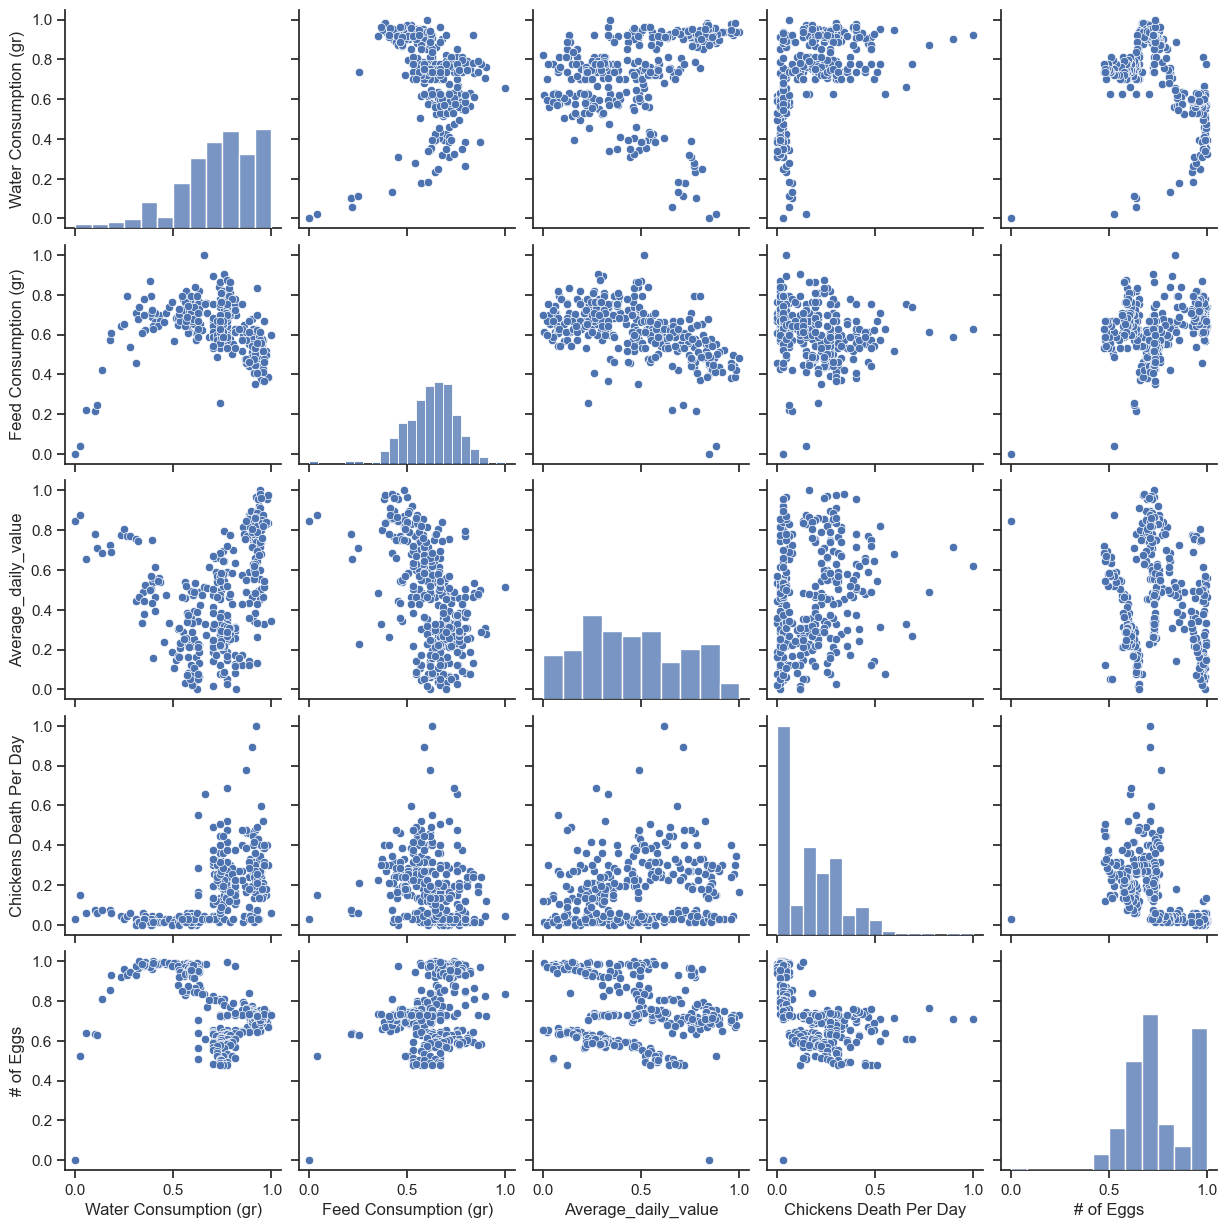

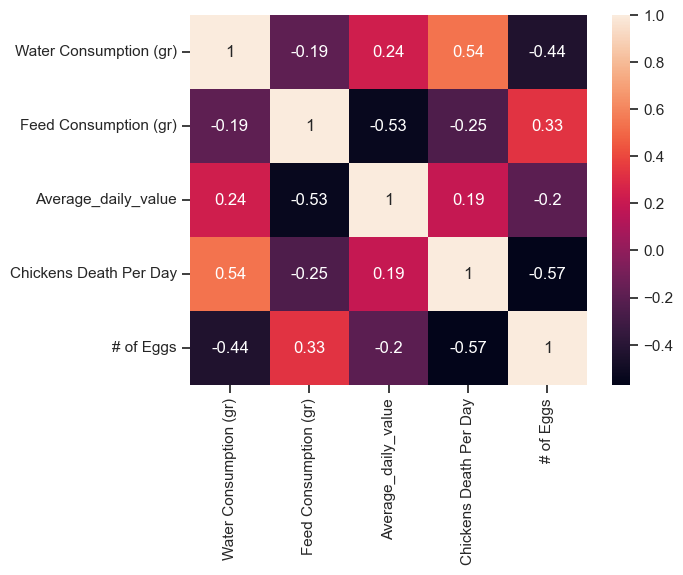

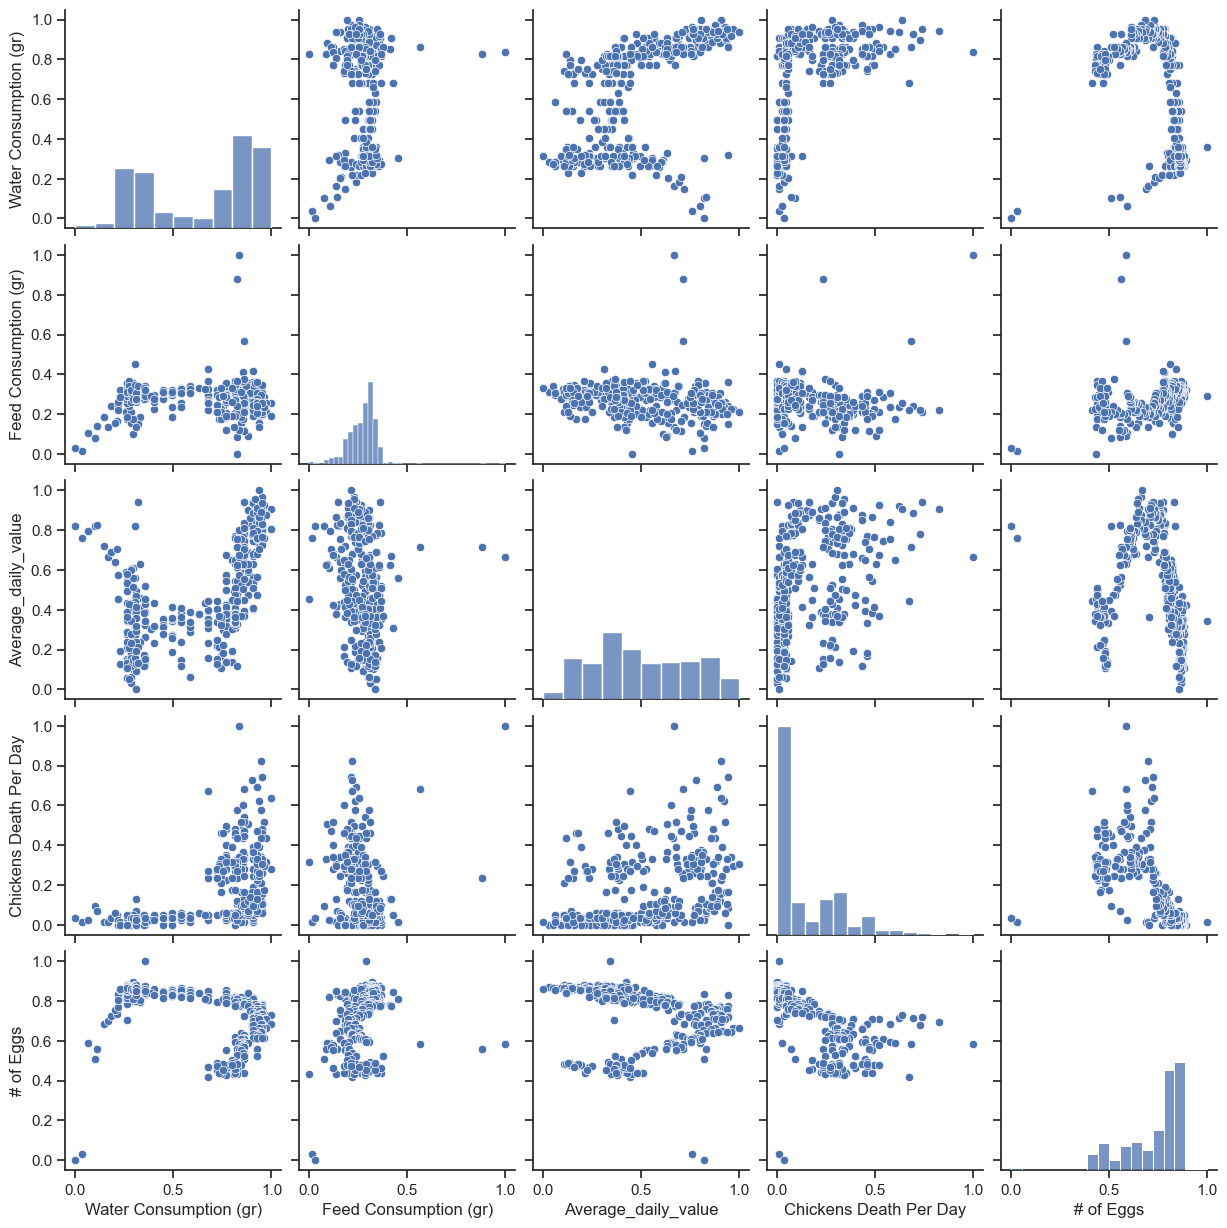

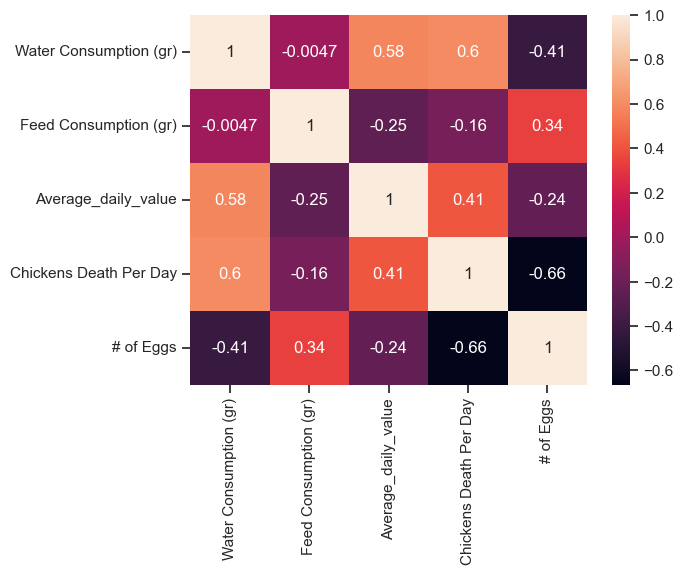

In [24]:
# input (x) and output (y) features
x_features = ["Water Consumption (gr)", "Feed Consumption (gr)", "Average_daily_value"]
y_features = ["Chickens Death Per Day", "# of Eggs"]

# pair plot cycle A
#norm_a = np.array()
sns.set(style="ticks", color_codes=True)
sns.pairplot(weather_join_chickens_a[x_features + y_features])
plt.show()

# heatmap cycle A
sns.heatmap(weather_join_chickens_a[x_features + y_features].corr(), annot=True)
plt.show()
# found a strong correlation between:
#   -   FEED and EGGS
#   -   WATER and DEATH

# pair plot cycle B
sns.set(style="ticks", color_codes=True)
sns.pairplot(weather_join_chickens_b[x_features + y_features])
plt.show()

# heatmap cycle B
sns.heatmap(weather_join_chickens_b[x_features + y_features].corr(), annot=True)
plt.show()